In [81]:
import numpy as np
import pandas as pd
import random
import seaborn as sns
from datascience import *
from scipy import stats
from statsmodels.formula.api import ols
from scipy.stats import gaussian_kde
import scipy.stats
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings("ignore")

In [82]:
ecourse = pd.read_csv("Historic_Times.csv")

ecourse[ecourse['Gender']=='M']['Time'].min()/60

16.05

In [83]:
.23*60

13.8

In [84]:
ecourse = pd.read_csv("Historic_Times.csv")

ecourse_fall2021 = ecourse[ecourse['Cat']=='new'][ecourse['Time'] < 5000]

ecourse.head()

,Cat,Gender,Time
0,old,M,1156
1,old,M,1165
2,old,M,1166
3,old,M,1172
4,old,M,1185


In [85]:
ecourse.groupby(['Cat','Gender']).count()

Time
Cat Gender      
new F         16
    M        180
old F        105
    M        721

# Male Normality Check

In [86]:
male_times = ecourse[ecourse['Gender']=='M']['Time']
print(len((male_times)))
male_mean = np.mean(male_times)
male_sd = np.std(male_times)

shapiro_test = stats.shapiro(male_times)
shapiro_test # assume normality

901


ShapiroResult(statistic=0.9578097462654114, pvalue=1.9681822733825637e-15)

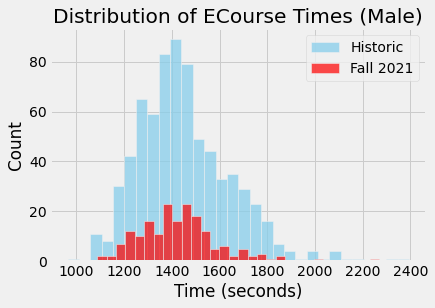

In [87]:
ax = sns.histplot(data=ecourse[ecourse['Cat']=='old'][ecourse['Gender']=='M'], x="Time", color="skyblue", label="Historic", kde=False, bins=30)
sns.histplot(data=ecourse[ecourse['Cat']=='new'][ecourse['Gender']=='M'], x="Time", color="red", label="Fall 2021", kde=False, alpha=.7, bins=30
    )
ax.set(title='Distribution of ECourse Times (Male)')
plt.xlabel('Time (seconds)')
plt.legend() 
plt.show()

In [88]:
male_time_hist = ecourse[ecourse['Cat']=='old'][ecourse['Gender']=='M']['Time']
male_time_hist_mean = np.mean(male_time_hist)
male_time_hist_var = np.var(male_time_hist)
male_time_2021 = ecourse[ecourse['Cat']=='new'][ecourse['Gender']=='M']['Time']
male_time_2021_mean = np.mean(male_time_2021)
male_time_2021_var = np.var(male_time_2021)

male_time_mean_overall = np.mean(ecourse[ecourse['Gender']=='M']['Time'])
print(male_time_hist_mean, male_time_hist_std, 
      male_time_2021_mean, male_time_2021_std,
     male_time_mean_overall)


SSB = (len(male_time_hist)*(male_time_mean_overall - male_time_hist_mean)**2 + 
       len(male_time_2021)*(male_time_mean_overall - male_time_2021_mean)**2)
print(SSB)

SSW = len(male_time_hist)*male_time_hist_var + len(male_time_2021)*male_time_2021_var
print(SSW)

dogb = 2-1
dogw = len(male_time_hist)+len(male_time_2021)-2

MSB = SSB/dogb
MSW = SSW/dogw
F_stat = MSB/MSW
print(F_stat)

p = 1-scipy.stats.f.cdf(F_stat, dogb, dogw)

print(p)

NameError: name 'male_time_hist_std' is not defined

### Male Scoring

In [ ]:
np.arange(10,92, 2)

In [89]:
print(male_mean)
print(male_sd)

male_time_hist = ecourse[ecourse['Cat']=='old'][ecourse['Gender']=='M']['Time']
male_time_2021 = ecourse[ecourse['Cat']=='new'][ecourse['Gender']=='M']['Time']


p_diff = []
p1 = stats.scoreatpercentile(male_time_hist,10)
for p in np.arange(12,92, 2):
    if p>=12:
        p_diff.append(stats.scoreatpercentile(male_time_hist,p) - p1)
        p1 = stats.scoreatpercentile(male_time_hist, p)
              
np.mean(p_diff)     

1447.7935627081022
189.47262987681023


12.075

In [90]:
print(male_mean)
print(male_sd)

male_time_hist = ecourse[ecourse['Cat']=='old'][ecourse['Gender']=='M']['Time']
male_time_2021 = ecourse[ecourse['Cat']=='new'][ecourse['Gender']=='M']['Time']

p5 = stats.scoreatpercentile(male_time_hist, 5)
p10 = stats.scoreatpercentile(male_time_hist, 10)
p15 = stats.scoreatpercentile(male_time_hist, 15)
p20 = stats.scoreatpercentile(male_time_hist, 20)
p25 = stats.scoreatpercentile(male_time_hist, 25)
p30 = stats.scoreatpercentile(male_time_hist, 30)
p35 = stats.scoreatpercentile(male_time_hist, 35)
p40 = stats.scoreatpercentile(male_time_hist, 40)
p45 = stats.scoreatpercentile(male_time_hist, 45)
p50 = stats.scoreatpercentile(male_time_hist, 50)
p55 = stats.scoreatpercentile(male_time_hist, 55)
p60 = stats.scoreatpercentile(male_time_hist, 60)
p65 = stats.scoreatpercentile(male_time_hist, 65)
p70 = stats.scoreatpercentile(male_time_hist, 70)
p75 = stats.scoreatpercentile(male_time_hist, 75)
p80 = stats.scoreatpercentile(male_time_hist, 80)
p85 = stats.scoreatpercentile(male_time_hist, 85)
p90 = stats.scoreatpercentile(male_time_hist, 90)

p_list = [p5, p10, p15, p20, p25, p30, p35, p40, p45, p50, p55, p60, p65, p70, p75, p80, p85, p90]

p_diff = []
for p in np.arange(0,len(p_list)):
    if p>=1:
        print(p_list[p]-p_list[p-1])
        p_diff.append(p_list[p]-p_list[p-1])
    elif p>len(p_list):
        break
        
print(p10, p25, p50, p90)
print(np.mean(p_diff[1:18])/3)
p50/60

1447.7935627081022
189.47262987681023
44.0
38.0
23.0
28.0
25.0
19.0
20.0
19.0
19.0
26.0
19.0
24.0
29.0
44.0
43.0
45.0
62.0
1231.0 1320.0 1422.0 1714.0
10.0625


23.7

In [91]:
.56*60

33.6

In [110]:
max_score = 20*60+30 # 21 minutes
dec  = 10        # 10 seconds
min_score = 28*60+30 # 28 minutes
(max_score-min_score)/dec

score_df = pd.DataFrame(columns=['Score (%)', 'Time (male)'])

score_list = [100]
time_list = [max_score]
flag=True
counter = 0

while flag:

    time_list.append(time_list[counter]+dec)
    score_list.append(score_list[counter]-1)
    
    if score_list[counter]<=61:
        flag = False
    counter+=1
score_df['Time (male)'] = time_list
score_df['Score (%)'] = score_list

time = []
for index, row in score_df.iterrows():
    minute = np.round(np.floor(row['Time (male)']/60),0)
    seconds = np.mod(row['Time (male)'], 60)
    time.append(f"{minute:.0f}:{seconds:.0f}")
    
score_df['Time (male)'] = time

# Female Normality Check

In [111]:
female_times = ecourse[ecourse['Gender']=='F']['Time']
print(len((female_times)))
female_mean = np.mean(female_times)
female_sd = np.std(female_times)

shapiro_test = stats.shapiro(female_times)
shapiro_test # assume normality

121


ShapiroResult(statistic=0.9763303399085999, pvalue=0.031389933079481125)

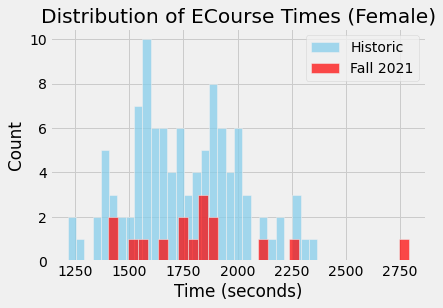

In [112]:
ax = sns.histplot(data=ecourse[ecourse['Cat']=='old'][ecourse['Gender']=='F'], x="Time", color="skyblue", label="Historic", kde=False, bins=30)
sns.histplot(data=ecourse[ecourse['Cat']=='new'][ecourse['Gender']=='F'], x="Time", color="red", label="Fall 2021", kde=False, alpha=.7, bins=30
    )
ax.set(title='Distribution of ECourse Times (Female)')
plt.xlabel('Time (seconds)')
plt.legend() 
plt.show()

In [113]:
female_time_hist = ecourse[ecourse['Cat']=='old'][ecourse['Gender']=='F']['Time']
female_time_hist_mean = np.mean(female_time_hist)
female_time_hist_var = np.var(female_time_hist)
female_time_2021 = ecourse[ecourse['Cat']=='new'][ecourse['Gender']=='F']['Time']
female_time_2021_mean = np.mean(female_time_2021)
female_time_2021_var = np.var(female_time_2021)

female_time_mean_overall = np.mean(ecourse[ecourse['Gender']=='F']['Time'])
print(female_time_hist_mean, female_time_hist_var, 
      female_time_2021_mean, female_time_2021_var,
     female_time_mean_overall)


SSB = (len(female_time_hist)*(female_time_mean_overall - female_time_hist_mean)**2 + 
       len(female_time_2021)*(female_time_mean_overall - female_time_2021_mean)**2)
print(SSB)

SSW = len(female_time_hist)*female_time_hist_var + len(female_time_2021)*female_time_2021_var
print(SSW)

dogb = 2-1
dogw = len(female_time_hist)+len(female_time_2021)-2

MSB = SSB/dogb
MSW = SSW/dogw
F_stat = MSB/MSW
print(F_stat)

p = 1-scipy.stats.f.cdf(F_stat, dogb, dogw)

print(p)

1748.304761904762 63392.23092970522 1828.0625 111696.18359375 1758.8512396694214
88322.13719500172
8443323.185119048
1.2448101411928854
0.26679398738478954


In [114]:
print(male_mean)
print(male_sd)

female_time_hist = ecourse[ecourse['Cat']=='old'][ecourse['Gender']=='F']['Time']
female_time_2021 = ecourse[ecourse['Cat']=='new'][ecourse['Gender']=='F']['Time']


p_diff = []
p1 = stats.scoreatpercentile(female_time_hist,10)
for p in np.arange(12,92, 2):
    if p>=12:
        p_diff.append(stats.scoreatpercentile(female_time_hist,p) - p1)
        p1 = stats.scoreatpercentile(female_time_hist, p)
              
np.mean(p_diff) 

1447.7935627081022
189.47262987681023


15.669999999999993

In [115]:
print(female_mean)
print(female_sd)

female_time_hist = ecourse[ecourse['Cat']=='old'][ecourse['Gender']=='F']['Time']
female_time_2021 = ecourse[ecourse['Cat']=='new'][ecourse['Gender']=='F']['Time']

p5 = stats.scoreatpercentile(female_time_hist, 5)
p10 = stats.scoreatpercentile(female_time_hist, 10)
p15 = stats.scoreatpercentile(female_time_hist, 15)
p20 = stats.scoreatpercentile(female_time_hist, 20)
p25 = stats.scoreatpercentile(female_time_hist, 25)
p30 = stats.scoreatpercentile(female_time_hist, 30)
p35 = stats.scoreatpercentile(female_time_hist, 35)
p40 = stats.scoreatpercentile(female_time_hist, 40)
p45 = stats.scoreatpercentile(female_time_hist, 45)
p50 = stats.scoreatpercentile(female_time_hist, 50)
p55 = stats.scoreatpercentile(female_time_hist, 55)
p60 = stats.scoreatpercentile(female_time_hist, 60)
p65 = stats.scoreatpercentile(female_time_hist, 65)
p70 = stats.scoreatpercentile(female_time_hist, 70)
p75 = stats.scoreatpercentile(female_time_hist, 75)
p80 = stats.scoreatpercentile(female_time_hist, 80)
p85 = stats.scoreatpercentile(female_time_hist, 85)
p90 = stats.scoreatpercentile(female_time_hist, 90)

p_list = [p5, p10, p15, p20, p25, p30, p35, p40, p45, p50, p55, p60, p65, p70, p75, p80, p85, p90]

p_diff = []
for p in np.arange(0,len(p_list)):
    if p>=1:
        print(p_list[p]-p_list[p-1])
        p_diff.append(p_list[p]-p_list[p-1])
    elif p>len(p_list):
        break
        

        
print(p10, p25, p50, p90)
print(np.mean(p_diff[1:18]))
p10/60

1758.8512396694214
265.53618486690254
41.0
91.0
39.0
24.59999999999991
14.600000000000136
36.799999999999955
35.79999999999973
28.800000000000182
41.0
56.200000000000045
48.600000000000136
37.799999999999955
18.999999999999773
43.40000000000009
20.600000000000136
51.79999999999973
37.799999999999955
1414.4 1569.0 1726.0 2041.1999999999998
39.17499999999998


23.573333333333334

In [116]:
.57*60

34.199999999999996

In [122]:
max_score = 23*60+30 # 23:30 minutes
dec  = 15        # 10 seconds
min_score = 2100 # 34 minutes
(max_score-min_score)/dec

#score_df = pd.DataFrame(columns=['Score (%)', 'Time (male)'])

score_list = [100]
time_list = [max_score]
flag=True
counter = 0

while flag:

    time_list.append(time_list[counter]+dec)
    score_list.append(score_list[counter]-1)
    
    if score_list[counter]<=61:
        flag = False
    counter+=1
score_df['Time (female)'] = time_list
score_df['Score (%)'] = score_list

time = []
for index, row in score_df.iterrows():
    minute = np.round(np.floor(row['Time (female)']/60),0)
    seconds = np.mod(row['Time (female)'], 60)
    time.append(str(f"{minute:.0f}:{seconds:.0f}"))
    
score_df['Time (female)'] = time

In [128]:
score_df.head(50)
score_df.to_csv('Ecourse_Table.csv', date_format='str')

In [124]:
score_df.to_csv?

In [48]:
print(len(ecourse[ecourse['Cat']=='old'][ecourse['Gender']=='M']['Time'][ecourse['Time']<=21*60]))
print(len(male_time_hist))
print(len(ecourse[ecourse['Cat']=='old'][ecourse['Gender']=='M']['Time'][ecourse['Time']<=21*60])/len(male_time_hist))

print(len(ecourse[ecourse['Cat']=='old'][ecourse['Gender']=='M']['Time'][ecourse['Time']>27*60+10]))
print(len(male_time_hist))
print(len(ecourse[ecourse['Cat']=='old'][ecourse['Gender']=='M']['Time'][ecourse['Time']>27*60+10])/len(male_time_hist))

101
721
0.14008321775312066
129
721
0.17891816920943135


In [49]:
print(len(ecourse[ecourse['Cat']=='old'][ecourse['Gender']=='F']['Time'][ecourse['Time']<=25*60]))
print(len(female_time_hist))
print(len(ecourse[ecourse['Cat']=='old'][ecourse['Gender']=='F']['Time'][ecourse['Time']<=25*60])/len(female_time_hist))

print(len(ecourse[ecourse['Cat']=='old'][ecourse['Gender']=='F']['Time'][ecourse['Time']>33*60+30]))
print(len(female_time_hist))
print(len(ecourse[ecourse['Cat']=='old'][ecourse['Gender']=='F']['Time'][ecourse['Time']>33*60+30])/len(female_time_hist))

16
105
0.1523809523809524
14
105
0.13333333333333333


## Score the Results

In [50]:
male_times = ecourse[ecourse['Cat']=='new'][ecourse['Gender']=='M']['Time']
#male_times = np.random.choice(list(male_times),replace = True, size = 721)

male_df = pd.DataFrame(columns=['Score (%)', 'Time (male)'])
male_scores = []
male_t = []
for t in male_times:
    for index, row in score_df.iterrows():
        minutes = int(str(row['Time (male)'][0]+row['Time (male)'][1]))
        try: 
            seconds =  int(str(row['Time (male)'][3]+row['Time (male)'][4]))
        except: 
            seconds = int(str(row['Time (male)'][3]))

        if t > (minutes*60+seconds):
            score = row['Score (%)']
        else:
            break
    male_t.append(t)
    male_scores.append(score)

male_df['Score (%)'] = male_scores
male_df['Time (male)'] = male_t

male_df_new = male_df

In [51]:
print(len(male_df[male_df['Score (%)']>90])/len(male_df['Score (%)']))  #shooting for 20%

print(len(male_df[male_df['Score (%)']<=60])/len(male_df['Score (%)']))

0.24444444444444444
0.12777777777777777


In [52]:
p90 = stats.scoreatpercentile(male_df['Score (%)'], 90)
p50 = stats.scoreatpercentile(male_df['Score (%)'], 50)
p10 = stats.scoreatpercentile(male_df['Score (%)'], 10)
print(p90, p50, p10)

95.1 81.0 57.7


In [53]:
female_times= ecourse[ecourse['Cat']=='new'][ecourse['Gender']=='F'][ecourse['Time']<2700]['Time']
#female_times = np.random.choice(list(female_times),replace = True, size = 105)
female_df = pd.DataFrame(columns=['Score (%)', 'Time (female)'])
female_scores = []
female_t = []
for t in female_times:
    for index, row in score_df.iterrows():
        minutes = int(str(row['Time (female)'][0]+row['Time (female)'][1]))
        try: 
            seconds =  int(str(row['Time (female)'][3]+row['Time (female)'][4]))
        except: 
            seconds = int(str(row['Time (female)'][3]))

        if t > (minutes*60+seconds):
            score = row['Score (%)']
        else:
            break
    female_t.append(t)
    female_scores.append(score)

female_df['Score (%)'] = female_scores
female_df['Time (female)'] = female_t

female_df_new = female_df

In [54]:
print(len(female_df[female_df['Score (%)']>90])/len(female_df['Score (%)']))  #shooting for 20%

print(len(female_df[female_df['Score (%)']<=60])/len(female_df['Score (%)']))

0.06666666666666667
0.13333333333333333


In [55]:
p90 = stats.scoreatpercentile(female_df['Score (%)'], 90)
p50 = stats.scoreatpercentile(female_df['Score (%)'], 50)
p10 = stats.scoreatpercentile(female_df['Score (%)'], 10)
print(p90, p50, p10)

87.80000000000001 76.0 59.0


# Score Historic and Compare

In [56]:
male_times = ecourse[ecourse['Cat']=='old'][ecourse['Gender']=='M']['Time']

male_df = pd.DataFrame(columns=['Score (%)', 'Time (male)'])
male_scores = []
male_t = []
for t in male_times:
    for index, row in score_df.iterrows():
        minutes = int(str(row['Time (male)'][0]+row['Time (male)'][1]))
        try: 
            seconds =  int(str(row['Time (male)'][3]+row['Time (male)'][4]))
        except: 
            seconds = int(str(row['Time (male)'][3]))

        if t > (minutes*60+seconds):
            score = row['Score (%)']
        else:
            break
    male_t.append(t)
    male_scores.append(score)

male_df['Score (%)'] = male_scores
male_df['Time (male)'] = male_t

male_df.head()

p90 = stats.scoreatpercentile(male_df['Score (%)'], 90)
p50 = stats.scoreatpercentile(male_df['Score (%)'], 50)
p10 = stats.scoreatpercentile(male_df['Score (%)'], 10)
print(p90, p50, p10)

print(len(male_df[male_df['Score (%)']>90])/len(male_df['Score (%)']))  #shooting for 20%

print(len(male_df[male_df['Score (%)']<=60])/len(male_df['Score (%)']))

95.0 79.0 52.0
0.20249653259361997
0.18030513176144244


In [57]:
female_times= ecourse[ecourse['Cat']=='old'][ecourse['Gender']=='F']['Time']

female_df = pd.DataFrame(columns=['Score (%)', 'Time (female)'])
female_scores = []
female_t = []
for t in female_times:
    for index, row in score_df.iterrows():
        minutes = int(str(row['Time (female)'][0]+row['Time (female)'][1]))
        try: 
            seconds =  int(str(row['Time (female)'][3]+row['Time (female)'][4]))
        except: 
            seconds = int(str(row['Time (female)'][3]))

        if t > (minutes*60+seconds):
            score = row['Score (%)']
        else:
            break
    female_t.append(t)
    female_scores.append(score)

female_df['Score (%)'] = female_scores
female_df['Time (female)'] = female_t

female_df.head()

p90 = stats.scoreatpercentile(female_df['Score (%)'], 90)
p50 = stats.scoreatpercentile(female_df['Score (%)'], 50)
p10 = stats.scoreatpercentile(female_df['Score (%)'], 10)
print(p90, p50, p10)

print(len(female_df[female_df['Score (%)']>90])/len(female_df['Score (%)']))  #shooting for 20%

print(len(female_df[female_df['Score (%)']<=60])/len(female_df['Score (%)']))

92.0 78.0 51.8
0.1619047619047619
0.1619047619047619


In [60]:
female_df.head()

,Score (%),Time (female)
0,36,1214
1,36,1244
2,36,1393
3,100,1414
4,100,1415


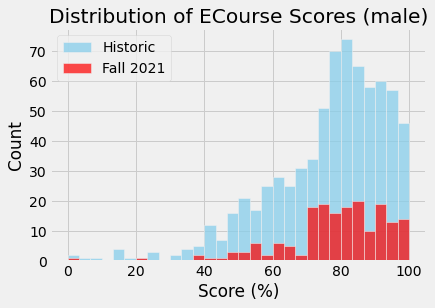

In [72]:
ax = sns.histplot(data=male_df, x="Score (%)", color="skyblue", label="Historic", kde=False, bins=30)
sns.histplot(data=male_df_new, x="Score (%)", color="red", label="Fall 2021", kde=False, alpha=.7, bins=30)
ax.set(title='Distribution of ECourse Scores (male)')
plt.xlabel('Score (%)')
plt.legend() 
plt.show()

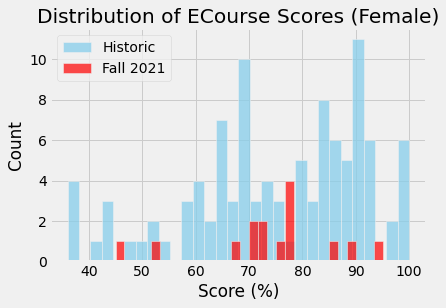

In [71]:
ax = sns.histplot(data=female_df, x="Score (%)", color="skyblue", label="Historic", kde=False, bins=30)
sns.histplot(data=female_df_new, x="Score (%)", color="red", label="Fall 2021", kde=False, alpha=.7, bins=30)
ax.set(title='Distribution of ECourse Scores (Female)')
plt.xlabel('Score (%)')
plt.legend() 
plt.show()

In [80]:
m = ecourse[ecourse['Gender']=='M']['Time']
m_var = np.var(m)

f = ecourse[ecourse['Gender']=='F']['Time']
f_var = np.var(f)

F = m_var / f_var
alpha = 0.05 #Or whatever you want your alpha to be.
df1 = len(m) - 1
df2 = len(f) - 1
p_value = scipy.stats.f.cdf(F, df1, df2)
print(p_value)

from scipy.stats import levene
stat, p = levene(m, f)
p



3.7874866335775345e-08


6.256980338284763e-08

In [78]:
scipy.stats.f.cdf?

In [ ]:
fstatistics = np.var(a, ddof=1)/np.var(b, ddof=1) # because we estimate mean from data
fdistribution = stats.f(len(a)-1,len(b)-1) # build an F-distribution object
p_value = 2*min(fdistribution.cdf(f_critical), 1-fdistribution.cdf(f_critical))
f_critical1 = fdistribution.ppf(0.025)
f_critical2 = fdistribution.ppf(0.975)
print(fstatistics,f_critical1, f_critical2 )
